<a href="https://colab.research.google.com/github/JHU-Kessler-Group/GraftedHybridLatexPaper/blob/main/Figure2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting Experimental Data from Github Repo

In [3]:
!rm -rf GraftedHybridLatexPaper
!git clone https://github.com/JHU-Kessler-Group/GraftedHybridLatexPaper.git

Cloning into 'GraftedHybridLatexPaper'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 72 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (72/72), 15.54 MiB | 18.29 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [4]:
import pandas as pd
pu_0_0_df = pd.read_csv('/content/GraftedHybridLatexPaper/Data/Figure2a_Tensile_PU/PU_0_0.csv')
# display(pu_0_0_df.head())

### Smoothing the data with with EWM
 Time series data smoothing using Pandas's Exponential Weighted Moving (EWM) function.
$$
S_t = \alpha Y_t + (1 - \alpha) S_{t-1}
$$

 Alpha, is the smoothing factor, and varies from 0 to 1.  A larger alpha (closer to 1) gives more weight to recent data (less smoothing). A smaller alpha (closer to 0) gives more weight to older data (more smoothing).

 See https://www.youtube.com/watch?v=10GB16dTST8 for details.   

In [5]:
import numpy as np
alpha=0.15
noisy_data=pu_0_0_df
smoothed_data=noisy_data.ewm(alpha=alpha, adjust=False).mean()

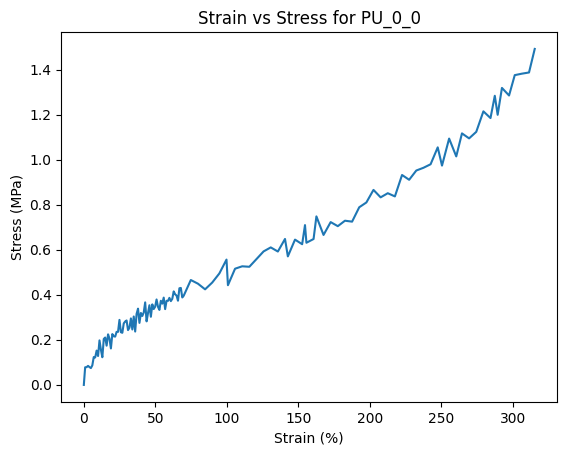

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df)
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.title('Strain vs Stress for PU_0_0')
plt.show()

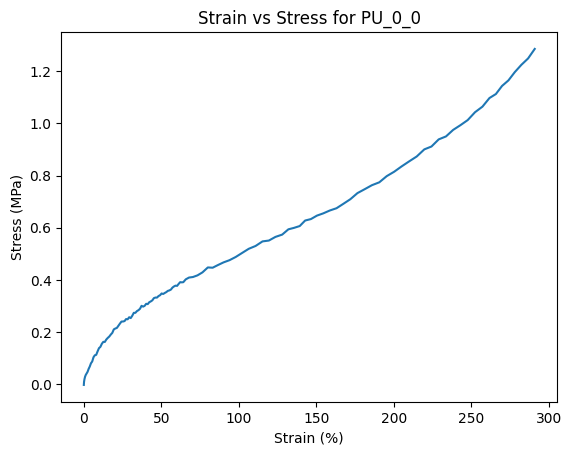

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed_data)
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.title('Strain vs Stress for PU_0_0')
plt.show()

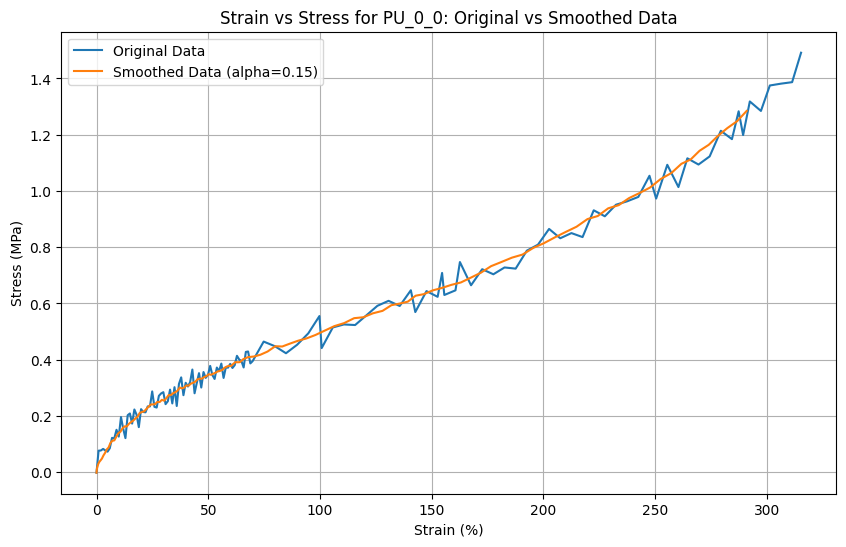

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a single plot
plt.figure(figsize=(10, 6)) # Optional: Adjust figure size

# Plot the original data
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df, label='Original Data')

# Plot the smoothed data
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed_data, label=f'Smoothed Data (alpha={alpha})')

plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.title('Strain vs Stress for PU_0_0: Original vs Smoothed Data')
plt.legend() # Show legend to distinguish the lines
plt.grid(True) # Optional: Add grid for better readability
plt.show()

Savitzky–Golay Filter to preserve the data at the high end of the stress-strain curve.

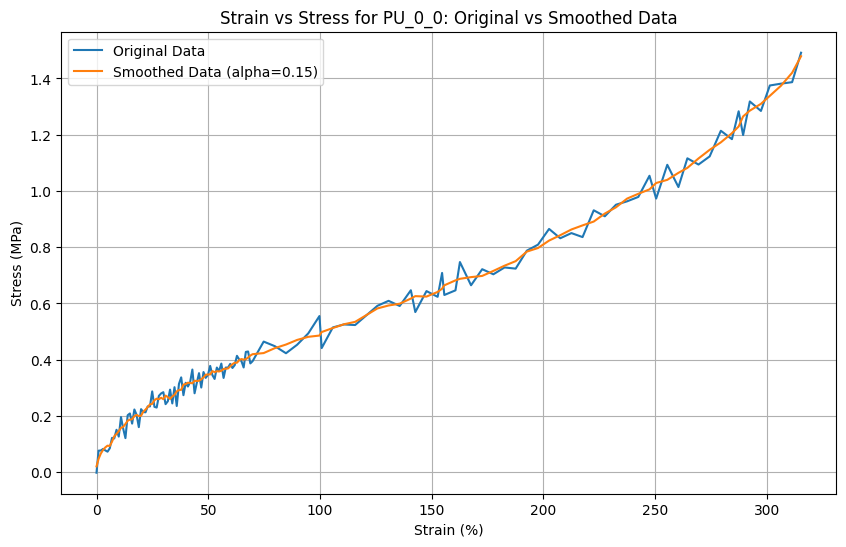

In [11]:
from scipy.signal import savgol_filter

# Apply Savitzky-Golay smoothing
smoothed_stress = savgol_filter(pu_0_0_df['Stress (MPa)'], window_length=11, polyorder=3)

# Create new smoothed DataFrame
smoothed_data = pu_0_0_df.copy()
smoothed_data['Stress (MPa)'] = smoothed_stress

# Create a single plot
plt.figure(figsize=(10, 6)) # Optional: Adjust figure size

# Plot the original data
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df, label='Original Data')

# Plot the smoothed data
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed_data, label=f'Smoothed Data (alpha={alpha})')

plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.title('Strain vs Stress for PU_0_0: Original vs Smoothed Data')
plt.legend() # Show legend to distinguish the lines
plt.grid(True) # Optional: Add grid for better readability
plt.show()

<Axes: xlabel='Strain (%)', ylabel='Stress (MPa)'>

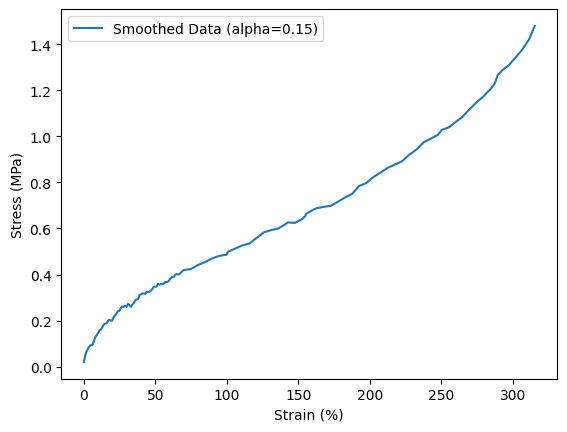

In [12]:
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed_data, label=f'Smoothed Data (alpha={alpha})')


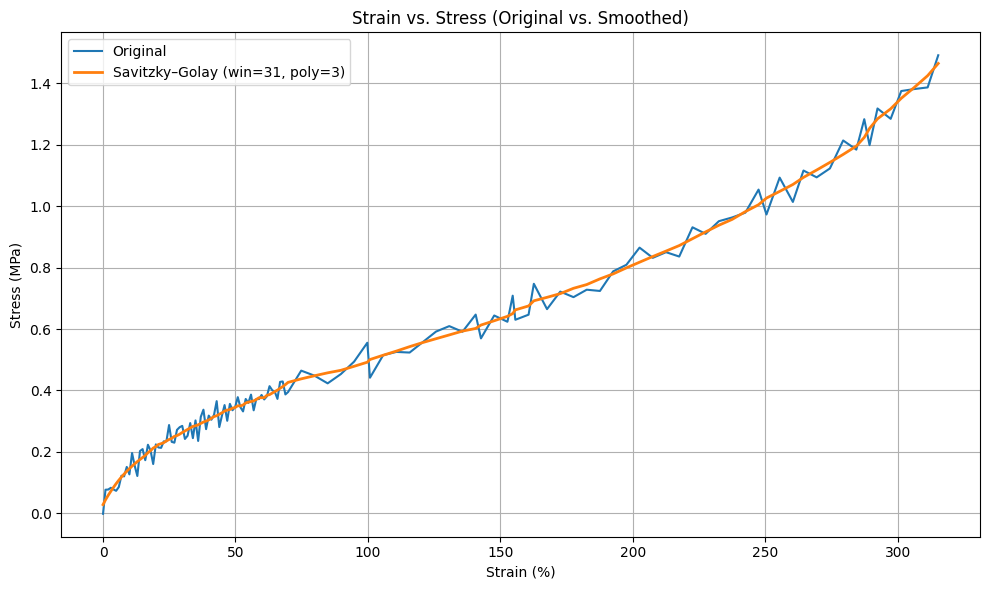

In [13]:
# If you're in Colab, uncomment the next line to ensure scipy/statsmodels are present
# !pip install scipy statsmodels

import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load & prep data ---
pu_0_0_df = pd.read_csv('/content/GraftedHybridLatexPaper/Data/Figure2a_Tensile_PU/PU_0_0.csv')

# (Recommended) sort by x just in case, and drop obvious NaNs
pu_0_0_df = pu_0_0_df.sort_values('Strain (%)').dropna(subset=['Strain (%)','Stress (MPa)']).reset_index(drop=True)

x = pu_0_0_df['Strain (%)'].to_numpy()
y = pu_0_0_df['Stress (MPa)'].to_numpy()

# --- Savitzky–Golay smoothing (recommended) ---
# Choose an odd window based on data length; adjust the multiplier for more/less smoothing.
# Ensure window_length > polyorder and window_length <= len(y)
def choose_window_length(n, target_points=41):
    # Aim for ~target_points; clamp to [5, 301], make odd, and not exceed n
    w = min(max(5, target_points), min(301, n if n % 2 == 1 else n-1))
    if w % 2 == 0: w -= 1
    if w <= 3: w = 5  # safety
    return w

polyorder = 3
window_length = choose_window_length(len(y), target_points=31)
if window_length <= polyorder:  # final safety guard
    window_length = polyorder + 2 + ((polyorder + 2) % 2 == 0)

y_sg = savgol_filter(y, window_length=window_length, polyorder=polyorder, mode='interp')

smoothed_data = pu_0_0_df.copy()
smoothed_data['Stress (MPa)'] = y_sg

# --- OPTIONAL: LOWESS (good for strong nonlinearity) ---
# Toggle on if you want to compare; keep frac small to preserve peaks (e.g., 0.03–0.08)
use_lowess = False
if use_lowess:
    lw = lowess(y, x, frac=0.05, return_sorted=True)
    lowess_df = pd.DataFrame({'Strain (%)': lw[:,0], 'Stress (MPa)': lw[:,1]})

# --- Plot: original vs smoothed ---
plt.figure(figsize=(10, 6))
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df, label='Original', linewidth=1.5)
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed_data, label=f'Savitzky–Golay (win={window_length}, poly={polyorder})', linewidth=2)

if use_lowess:
    sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=lowess_df, label='LOWESS (frac=0.05)', linewidth=2, linestyle='--')

plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.title('Strain vs. Stress (Original vs. Smoothed)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Savitzky-Golay Filter

Increase window_length for more smoothing, decrease to preserve sharper features.

Keep polyorder=3 or 4 for stress-strain; higher orders can ring.

## LOWESS (Locally Weighted Regression)

Decrease frac (e.g., 0.03-0.05) to better retain the yield/necking region.

Increase slightly if you still see noise.

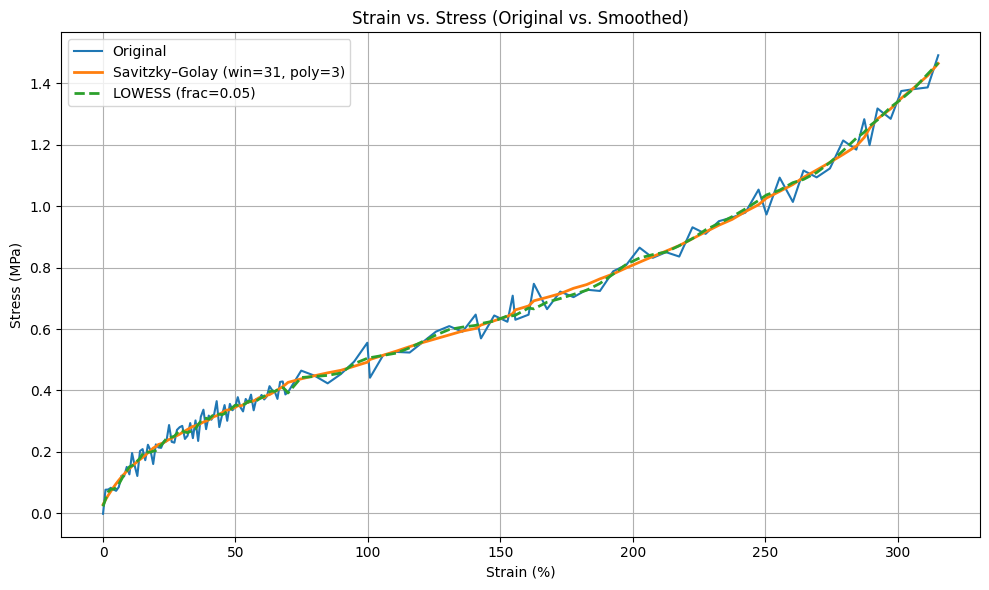

In [14]:
# If you're in Colab, uncomment the next line to ensure scipy/statsmodels are present
# !pip install scipy statsmodels

import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from statsmodels.nonparametric.smoothers_lowess import lowess
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load & prep data ---
pu_0_0_df = pd.read_csv('/content/GraftedHybridLatexPaper/Data/Figure2a_Tensile_PU/PU_0_0.csv')

# (Recommended) sort by x just in case, and drop obvious NaNs
pu_0_0_df = pu_0_0_df.sort_values('Strain (%)').dropna(subset=['Strain (%)','Stress (MPa)']).reset_index(drop=True)

x = pu_0_0_df['Strain (%)'].to_numpy()
y = pu_0_0_df['Stress (MPa)'].to_numpy()

# --- Savitzky–Golay smoothing (recommended) ---
# Choose an odd window based on data length; adjust the multiplier for more/less smoothing.
# Ensure window_length > polyorder and window_length <= len(y)
def choose_window_length(n, target_points=41):
    # Aim for ~target_points; clamp to [5, 301], make odd, and not exceed n
    w = min(max(5, target_points), min(301, n if n % 2 == 1 else n-1))
    if w % 2 == 0: w -= 1
    if w <= 3: w = 5  # safety
    return w

polyorder = 3
window_length = choose_window_length(len(y), target_points=31)
if window_length <= polyorder:  # final safety guard
    window_length = polyorder + 2 + ((polyorder + 2) % 2 == 0)

y_sg = savgol_filter(y, window_length=window_length, polyorder=polyorder, mode='interp')

smoothed_data = pu_0_0_df.copy()
smoothed_data['Stress (MPa)'] = y_sg

# --- OPTIONAL: LOWESS (good for strong nonlinearity) ---
# Toggle on if you want to compare; keep frac small to preserve peaks (e.g., 0.03–0.08)
use_lowess = True
if use_lowess:
    lw = lowess(y, x, frac=0.05, return_sorted=True)
    lowess_df = pd.DataFrame({'Strain (%)': lw[:,0], 'Stress (MPa)': lw[:,1]})

# --- Plot: original vs smoothed ---
plt.figure(figsize=(10, 6))
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=pu_0_0_df, label='Original', linewidth=1.5)
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed_data, label=f'Savitzky–Golay (win={window_length}, poly={polyorder})', linewidth=2)

if use_lowess:
    sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=lowess_df, label='LOWESS (frac=0.05)', linewidth=2, linestyle='--')

plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.title('Strain vs. Stress (Original vs. Smoothed)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


<Axes: xlabel='Strain (%)', ylabel='Stress (MPa)'>

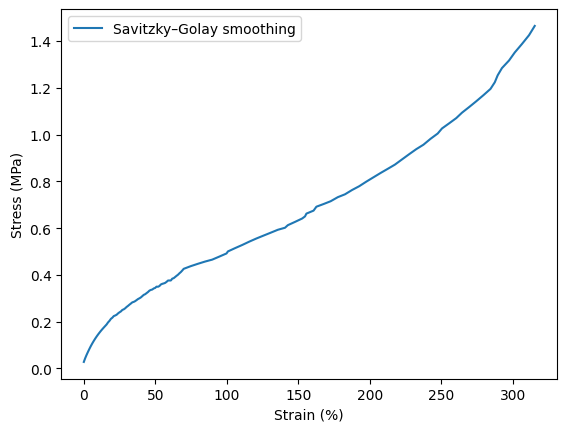

In [16]:
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed_data, label=f'Savitzky–Golay smoothing')


NameError: name 'frac' is not defined

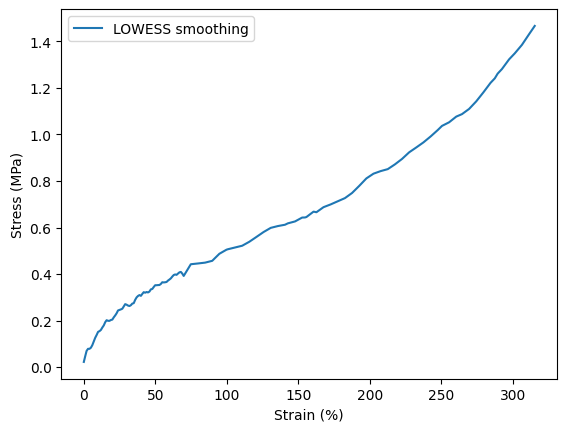

In [27]:
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=lowess_df, label=f'LOWESS smoothing')
print(frac)

<Axes: xlabel='Strain (%)', ylabel='Stress (MPa)'>

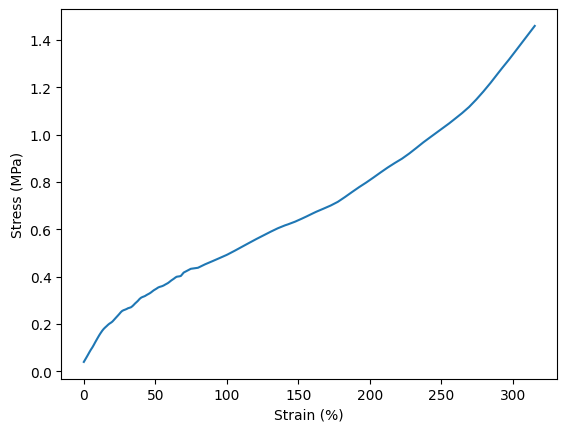

In [29]:
from statsmodels.nonparametric.smoothers_lowess import lowess

smoothed = lowess(pu_0_0_df['Stress (MPa)'],
                  pu_0_0_df['Strain (%)'],
                  frac=0.1)  # 0.02–0.1 typical - Adjust this value to change smoothing

smoothed_data = pd.DataFrame({
    'Strain (%)': smoothed[:, 0],
    'Stress (MPa)': smoothed[:, 1]
})
sns.lineplot(x='Strain (%)', y='Stress (MPa)', data=smoothed_data)